In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Проведение разведочного анализа данных (EDA)

Уникальные значения для каждого столбца:
 Unnamed: 0.1       1332600
Unnamed: 0         1332600
region                 116
ua_device_type           3
ua_client_type           3
ua_os                   28
ua_client_name          60
total_watchtime       6352
rutube_video_id     124535
viewer_uid          152778
adjusted_time        86348
title               123450
category                40
duration             97870
author_id            25520
age                     44
age_class                4
sex                      2
dtype: int64

Процент просмотренного видео по полу:
 sex
female    0.000683
male      0.000628
Name: percent_watched, dtype: float64

Количество выбросов:
 16801


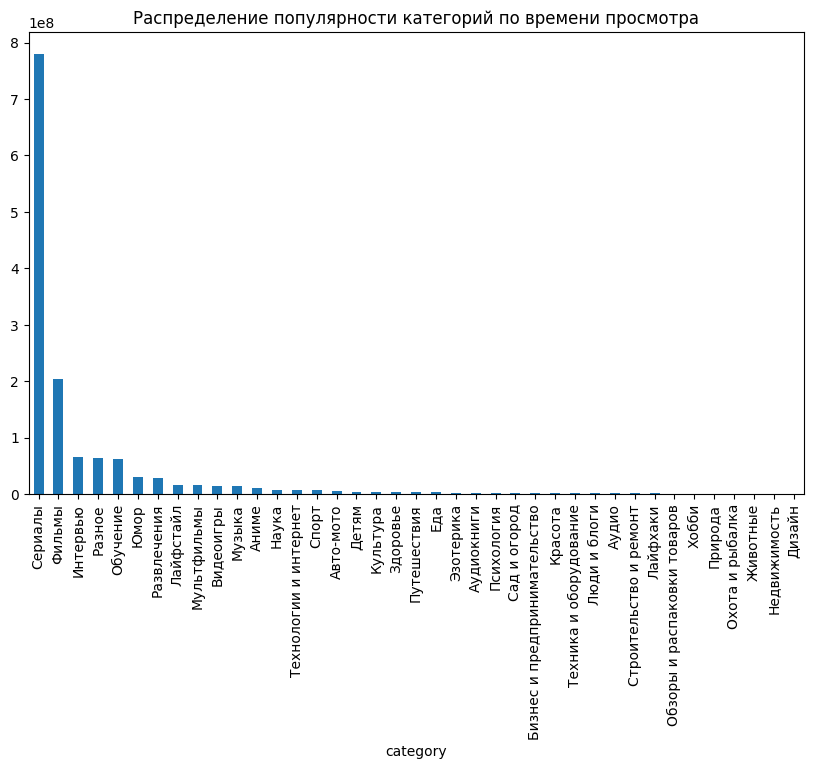


Топ 10 авторов по времени просмотра:
 author_id
1043618    160560087
1010000    110631933
1089828     91787610
1056177     58276414
1084744     46767518
1008828     31897015
1103638     27405830
1065558     23381357
1071736     19157967
1036095     19143124
Name: total_watchtime, dtype: int64

Топ 10 авторов среди женщин по времени просмотра:
 author_id
1089828    82836342
1043618    68219597
1084744    30190725
1056177    21367417
1103638    21291005
1065558    21035247
1008828    19932470
1071736    17871514
1095392    15123013
1090779    11291794
Name: total_watchtime, dtype: int64

Топ 10 авторов среди мужчин по времени просмотра:
 author_id
1010000    103604600
1043618     92340490
1056177     36908997
1084744     16576793
1011365     12299883
1036095     12108680
1008828     11964545
1037883     11559621
1034175     11356859
1093207     10561203
Name: total_watchtime, dtype: int64

Агрегация данных по авторам для возрастного класса 0:
 author_id
1043618    6718842
1089828    493

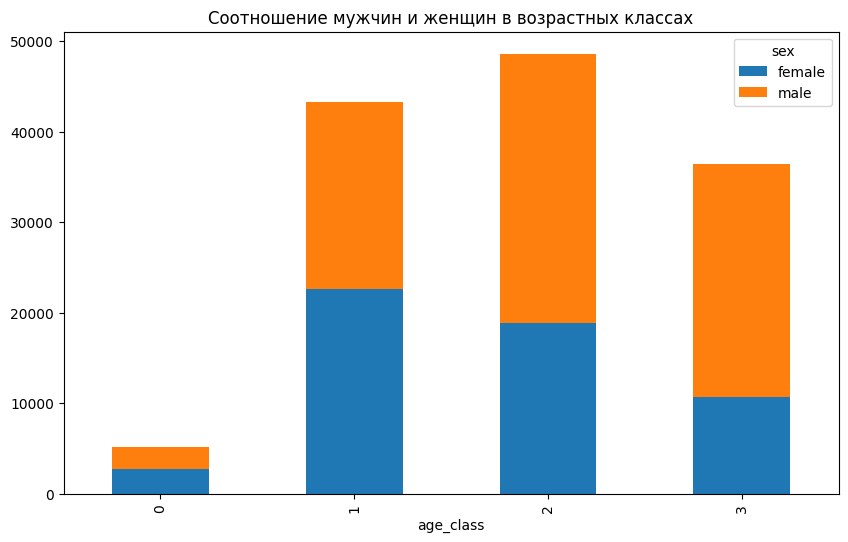

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('clear_data_times.csv')

# Статистика уникальных значений для каждого столбца
unique_values = df.nunique()
print("Уникальные значения для каждого столбца:\n", unique_values)

# Процент просмотренного видео (от общего времени видео) в зависимости от пола
df['percent_watched'] = df['total_watchtime'] / df['duration']
gender_watchtime = df.groupby('sex')['percent_watched'].mean()
print("\nПроцент просмотренного видео по полу:\n", gender_watchtime)

# Проверка на выбросы в данных (используя межквартильный размах)
Q1 = df['total_watchtime'].quantile(0.25)
Q3 = df['total_watchtime'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['total_watchtime'] < (Q1 - 1.5 * IQR)) | (df['total_watchtime'] > (Q3 + 1.5 * IQR))]
print("\nКоличество выбросов:\n", outliers.shape[0])

df = df[df['category']!='Телепередачи']

# Распределение популярности категорий видео по времени просмотра
category_watchtime = df.groupby('category')['total_watchtime'].sum().sort_values(ascending=False)
category_watchtime.plot(kind='bar', title='Распределение популярности категорий по времени просмотра', figsize=(10,6))
plt.show()

# Анализ топ авторов видео по времени просмотра
top_authors = df.groupby('author_id')['total_watchtime'].sum().sort_values(ascending=False).head(10)
print("\nТоп 10 авторов по времени просмотра:\n", top_authors)

# Анализ топ авторов только по женскому полу ('female')
top_female_authors = df[df['sex'] == 'female'].groupby('author_id')['total_watchtime'].sum().sort_values(ascending=False).head(10)
print("\nТоп 10 авторов среди женщин по времени просмотра:\n", top_female_authors)

# Анализ топ авторов только по мужскому полу ('male')
top_male_authors = df[df['sex'] == 'male'].groupby('author_id')['total_watchtime'].sum().sort_values(ascending=False).head(10)
print("\nТоп 10 авторов среди мужчин по времени просмотра:\n", top_male_authors)

# Агрегация данных по авторам для возрастного класса 0
age_class_0 = df[df['age_class'] == 0].groupby('author_id')['total_watchtime'].sum().sort_values(ascending=False)
print("\nАгрегация данных по авторам для возрастного класса 0:\n", age_class_0)

# Агрегация данных по авторам для возрастного класса 1
age_class_1 = df[df['age_class'] == 1].groupby('author_id')['total_watchtime'].sum().sort_values(ascending=False)
print("\nАгрегация данных по авторам для возрастного класса 1:\n", age_class_1)

# Агрегация данных по авторам для возрастного класса 2
age_class_2 = df[df['age_class'] == 2].groupby('author_id')['total_watchtime'].sum().sort_values(ascending=False)
print("\nАгрегация данных по авторам для возрастного класса 2:\n", age_class_2)

# Агрегация данных по авторам для возрастного класса 3
age_class_3 = df[df['age_class'] == 3].groupby('author_id')['total_watchtime'].sum().sort_values(ascending=False)
print("\nАгрегация данных по авторам для возрастного класса 3:\n", age_class_3)

# Соотношение мужчин и женщин в каждом возрастном классе (уникальные пользователи)
gender_age_class = df.groupby(['age_class', 'sex'])['viewer_uid'].nunique().unstack()
print("\nСоотношение мужчин и женщин в каждом возрастном классе:\n", gender_age_class)

# Визуализация соотношения мужчин и женщин в каждом возрастном классе
gender_age_class.plot(kind='bar', stacked=True, title='Соотношение мужчин и женщин в возрастных классах', figsize=(10,6))
plt.show()